## Setup

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Frequency analysis with simple sine waves

Let's first generate a sine wave. We'll then generate a second sine wave and add these together to understand what a fourier transform of this data would look like. **Sine waves** are defined by their frequency, ampltitude, and and phase.

**Note**: This is meant to reinforce what you learned in the spectral analysis tutorial!

In [6]:
f = 1024 # Sampling frequency
dur = 1 # 10 seconds of signal
freq = 7 # 7 Hz signal
freq2 = 50 # 130 Hz signal

t = np.arange(0, dur, 1/f) # Generate a time vector

sig1 = np.sin(2 * np.pi * freq * t) # Generate a sine wave
sig1 = 2 * sig1; # Increase the power of signal 1

sig2 = np.sin(2 * np.pi * freq2 * t) # Generate another sine wavePlot our individual and combined waves:

Plot our individual and combined waves:

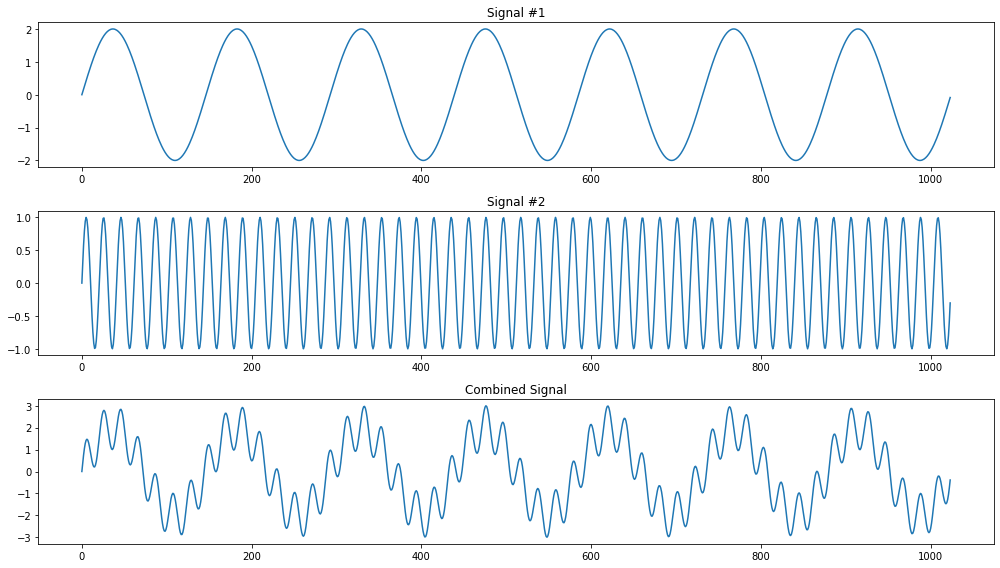

In [7]:
# Add signal 1 & 2
combined_signal = sig1+sig2

# Plot
fig,ax = plt.subplots(3,1,figsize=(14,8))
ax[0].plot(sig1)
ax[1].plot(sig2)
ax[2].plot(combined_signal)
ax[0].set_title('Signal #1')
ax[1].set_title('Signal #2')
ax[2].set_title('Combined Signal')
plt.tight_layout()
plt.show()

Below, we'll calculate the **Fourier Transform** using the fast fourier transform package from numpy. The fft (developed by Tukey -- same Tukey as the statistics Tukey -- in 1965) implements a _discrete_ Fourier transform for a digital signal.

In [ ]:
# Calculate the fourier transform of complex signal
fourier = np.fft.fft(combined_signal)/len(t) # Compute the fft, normalized by time

# Find frequency values for the x axis
nyq = f/2 # Determine the nyquist frequency

# Create freq bins for plotting by creating a vector from 0 to nyquist
# with as many points as in fft
fx_bins = np.linspace(0,nyq,int(np.floor(len(sig1)/2))+1)

# Plotting up to 200 Hz
plt.plot(fx_bins[0:200],abs(fourier[0:200])) # Plot a select range of frequencies
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')
plt.title('FFT of a our sine waves')
plt.show()

**Note**: As Pascal Wallisch & Eric Nylen have written: "Frequency space is a place of _magic and wonder_." The Fourier transform of a time series usually involves complex numbers with imaginary parts. If we plot the Fourier transform itself by typing `plt.plot(fourier)`, it will yield a funky plot. That’s because the complex numbers represent both magnitude and phase at once, but we are _only interested in amplitude or power_ at this point, which is why we plotted only the absolute values above. Also, if you type `plt.plot(abs(fourier))`, you will get a plot of all the magnitudes, but note that it is mirror-symmetric in the middle—it repeats after half the sampling rate.